In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(patchwork)
library(stringr)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”


In [2]:
image_paths <- file.path("..","..","data","7.montage_images","individual_images")


In [3]:
# get the list of images in the directory
list_of_images <- list.files(image_paths, full.names = TRUE)
list_of_images

[1] "../../data/7.montage_images/individual_images/MAX_high_1_L.png"  
 [2] "../../data/7.montage_images/individual_images/MAX_high_1_R.png"  
 [3] "../../data/7.montage_images/individual_images/MAX_high_10_L.png" 
 [4] "../../data/7.montage_images/individual_images/MAX_high_10_R.png" 
 [5] "../../data/7.montage_images/individual_images/MAX_high_11_L.png" 
 [6] "../../data/7.montage_images/individual_images/MAX_high_11_R.png" 
 [7] "../../data/7.montage_images/individual_images/MAX_high_12_L.png" 
 [8] "../../data/7.montage_images/individual_images/MAX_high_12_R.png" 
 [9] "../../data/7.montage_images/individual_images/MAX_high_13_L.png" 
[10] "../../data/7.montage_images/individual_images/MAX_high_13_R.png" 
[11] "../../data/7.montage_images/individual_images/MAX_high_14_L.png" 
[12] "../../data/7.montage_images/individual_images/MAX_high_14_R.png" 
[13] "../../data/7.montage_images/individual_images/MAX_high_2_L.png"  
[14] "../../data/7.montage_images/individual_images/MAX_high_2_R.png"  
[15] "../../data/7.montage_images/individual_images/MAX_high_3_L.png"  
[16] "../../data/7.montage_images/individual_images/MAX_high_3_R.png"  
[17] "../../data/7.montage_images/individual_images/MAX_high_4_L.png"  
[18] "../../data/7.montage_images/individual_images/MAX_high_4_R.png"  
[19] "../../data/7.montage_images/individual_images/MAX_high_5_L.png"  
[20] "../../data/7.montage_images/individual_images/MAX_high_5_R.png"  
[21] "../../data/7.montage_images/individual_images/MAX_high_6_L.png"  
[22] "../../data/7.montage_images/individual_images/MAX_high_6_R.png"  
[23] "../../data/7.montage_images/individual_images/MAX_high_7_L.png"  
[24] "../../data/7.montage_images/individual_images/MAX_high_7_R.png"  
[25] "../../data/7.montage_images/individual_images/MAX_high_8_L.png"  
[26] "../../data/7.montage_images/individual_images/MAX_high_8_R.png"  
[27] "../../data/7.montage_images/individual_images/MAX_high_9_L.png"  
[28] "../../data/7.montage_images/individual_images/MAX_high_9_R.png"  
[29] "../../data/7.montage_images/individual_images/MAX_unsel_1_L.png" 
[30] "../../data/7.montage_images/individual_images/MAX_unsel_1_R.png" 
[31] "../../data/7.montage_images/individual_images/MAX_unsel_10_L.png"
[32] "../../data/7.montage_images/individual_images/MAX_unsel_10_R.png"
[33] "../../data/7.montage_images/individual_images/MAX_unsel_11_R.png"
[34] "../../data/7.montage_images/individual_images/MAX_unsel_12_L.png"
[35] "../../data/7.montage_images/individual_images/MAX_unsel_12_R.png"
[36] "../../data/7.montage_images/individual_images/MAX_unsel_13_L.png"
[37] "../../data/7.montage_images/individual_images/MAX_unsel_13_R.png"
[38] "../../data/7.montage_images/individual_images/MAX_unsel_14_L.png"
[39] "../../data/7.montage_images/individual_images/MAX_unsel_14_R.png"
[40] "../../data/7.montage_images/individual_images/MAX_unsel_2_L.png" 
[41] "../../data/7.montage_images/individual_images/MAX_unsel_2_R.png" 
[42] "../../data/7.montage_images/individual_images/MAX_unsel_3_L.png" 
[43] "../../data/7.montage_images/individual_images/MAX_unsel_3_R.png" 
[44] "../../data/7.montage_images/individual_images/MAX_unsel_4_L.png" 
[45] "../../data/7.montage_images/individual_images/MAX_unsel_4_R.png" 
[46] "../../data/7.montage_images/individual_images/MAX_unsel_5_L.png" 
[47] "../../data/7.montage_images/individual_images/MAX_unsel_5_R.png" 
[48] "../../data/7.montage_images/individual_images/MAX_unsel_6_L.png" 
[49] "../../data/7.montage_images/individual_images/MAX_unsel_6_R.png" 
[50] "../../data/7.montage_images/individual_images/MAX_unsel_7_L.png" 
[51] "../../data/7.montage_images/individual_images/MAX_unsel_7_R.png" 
[52] "../../data/7.montage_images/individual_images/MAX_unsel_8_L.png" 
[53] "../../data/7.montage_images/individual_images/MAX_unsel_8_R.png" 
[54] "../../data/7.montage_images/individual_images/MAX_unsel_9_L.png" 
[55] "../../data/7.montage_images/individual_images/MAX_unsel_9_R.png" 
[56] "../../data/7.montage_images/individ

In [4]:
path <- "../../data/7.montage_images/individual_images/MAX_high_10_L.png"

In [5]:
width <- 2
height <- 2
options(repr.plot.width = width, repr.plot.height = height)
# define function to return the image object
get_image <- function(path){
    # Load the PNG file
    img <- png::readPNG(path)
    # Convert the image to a raster object
    g <- grid::rasterGrob(img, interpolate=TRUE)

    # Create a ggplot
    p <- ggplot() +
    annotation_custom(g, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) +
    theme_void() + # Remove axes and labels
    theme(plot.background = element_rect(fill = "#131313")) # Change the background color
    # Print the plot
    return(p)
}


In [6]:
length(list_of_images)

[1] 83

In [7]:
# split the list of images into 2 lists if it is L or R
L_images <- list_of_images[str_detect(list_of_images, "L")]
R_images <- list_of_images[str_detect(list_of_images, "R")]
# split the list by genotype 
L_images_WT <- L_images[str_detect(L_images, "wt")]
L_images_unsel <- L_images[str_detect(L_images, "unsel")]
L_images_high <- L_images[str_detect(L_images, "high")]
R_images_WT <- R_images[str_detect(R_images, "wt")]
R_images_unsel <- R_images[str_detect(R_images, "unsel")]
R_images_high <- R_images[str_detect(R_images, "high")]

In [8]:
L_WT_plots <- lapply(L_images_WT, get_image)
L_unsel_plots <- lapply(L_images_unsel, get_image)
L_high_plots <- lapply(L_images_high, get_image)
R_WT_plots <- lapply(R_images_WT, get_image)
R_unsel_plots <- lapply(R_images_unsel, get_image)
R_high_plots <- lapply(R_images_high, get_image)


In [14]:
# check list lengths
print(length(L_WT_plots))
print(length(R_WT_plots))
print(length(L_unsel_plots))
print(length(R_unsel_plots))
print(length(L_high_plots))
print(length(R_high_plots))
# check list imbalance
L_images_unsel
R_images_unsel
# drop the third item in R_unsel_plots to keep the lists balanced and paired
R_images_unsel <- R_images_unsel[-3]
R_images_unsel

[1] 14
[1] 14
[1] 13
[1] 14
[1] 14
[1] 14


[1] "../../data/7.montage_images/individual_images/MAX_unsel_1_L.png" 
 [2] "../../data/7.montage_images/individual_images/MAX_unsel_10_L.png"
 [3] "../../data/7.montage_images/individual_images/MAX_unsel_12_L.png"
 [4] "../../data/7.montage_images/individual_images/MAX_unsel_13_L.png"
 [5] "../../data/7.montage_images/individual_images/MAX_unsel_14_L.png"
 [6] "../../data/7.montage_images/individual_images/MAX_unsel_2_L.png" 
 [7] "../../data/7.montage_images/individual_images/MAX_unsel_3_L.png" 
 [8] "../../data/7.montage_images/individual_images/MAX_unsel_4_L.png" 
 [9] "../../data/7.montage_images/individual_images/MAX_unsel_5_L.png" 
[10] "../../data/7.montage_images/individual_images/MAX_unsel_6_L.png" 
[11] "../../data/7.montage_images/individual_images/MAX_unsel_7_L.png" 
[12] "../../data/7.montage_images/individual_images/MAX_unsel_8_L.png" 
[13] "../../data/7.montage_images/individual_images/MAX_unsel_9_L.png"

[1] "../../data/7.montage_images/individual_images/MAX_unsel_1_R.png" 
 [2] "../../data/7.montage_images/individual_images/MAX_unsel_10_R.png"
 [3] "../../data/7.montage_images/individual_images/MAX_unsel_12_R.png"
 [4] "../../data/7.montage_images/individual_images/MAX_unsel_13_R.png"
 [5] "../../data/7.montage_images/individual_images/MAX_unsel_14_R.png"
 [6] "../../data/7.montage_images/individual_images/MAX_unsel_2_R.png" 
 [7] "../../data/7.montage_images/individual_images/MAX_unsel_3_R.png" 
 [8] "../../data/7.montage_images/individual_images/MAX_unsel_4_R.png" 
 [9] "../../data/7.montage_images/individual_images/MAX_unsel_5_R.png" 
[10] "../../data/7.montage_images/individual_images/MAX_unsel_6_R.png" 
[11] "../../data/7.montage_images/individual_images/MAX_unsel_7_R.png" 
[12] "../../data/7.montage_images/individual_images/MAX_unsel_8_R.png" 
[13] "../../data/7.montage_images/individual_images/MAX_unsel_9_R.png"

[1] "../../data/7.montage_images/individual_images/MAX_unsel_1_R.png" 
 [2] "../../data/7.montage_images/individual_images/MAX_unsel_10_R.png"
 [3] "../../data/7.montage_images/individual_images/MAX_unsel_13_R.png"
 [4] "../../data/7.montage_images/individual_images/MAX_unsel_14_R.png"
 [5] "../../data/7.montage_images/individual_images/MAX_unsel_2_R.png" 
 [6] "../../data/7.montage_images/individual_images/MAX_unsel_3_R.png" 
 [7] "../../data/7.montage_images/individual_images/MAX_unsel_4_R.png" 
 [8] "../../data/7.montage_images/individual_images/MAX_unsel_5_R.png" 
 [9] "../../data/7.montage_images/individual_images/MAX_unsel_6_R.png" 
[10] "../../data/7.montage_images/individual_images/MAX_unsel_7_R.png" 
[11] "../../data/7.montage_images/individual_images/MAX_unsel_8_R.png" 
[12] "../../data/7.montage_images/individual_images/MAX_unsel_9_R.png"

[1] "../../data/7.montage_images/individual_images/MAX_unsel_1_R.png"

Scale bars are equal to 50 microns

In [10]:
# patch the plots together to make a montage 
width <- 8
height <- 5
options(repr.plot.width = width, repr.plot.height = height)

png 
  2

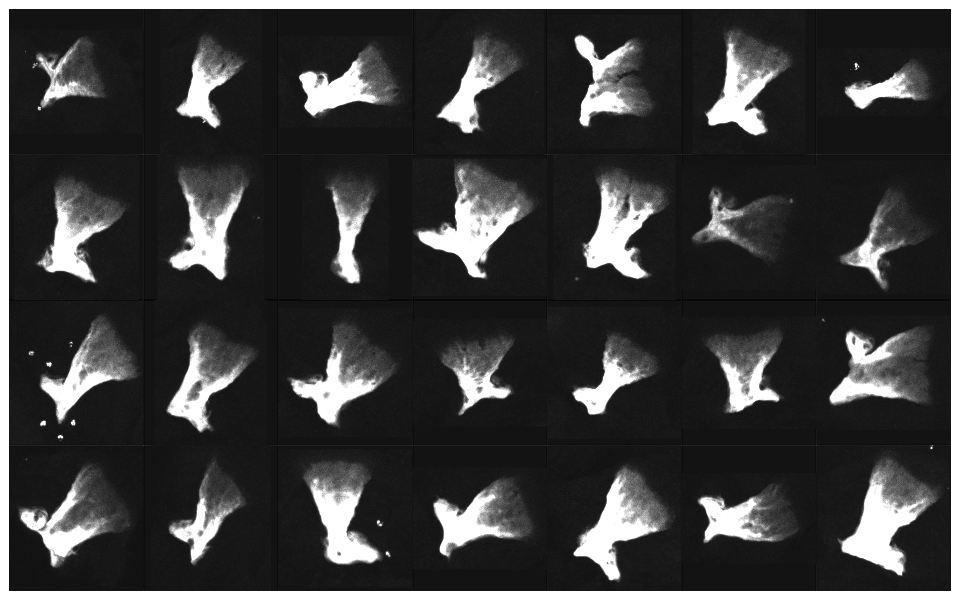

In [11]:

montage_high <- (
    L_high_plots[[1]] + R_high_plots[[1]] + L_high_plots[[2]] + R_high_plots[[2]] + L_high_plots[[3]] + R_high_plots[[3]] + L_high_plots[[4]] + R_high_plots[[4]] + L_high_plots[[5]] + R_high_plots[[5]]
    + L_high_plots[[6]] + R_high_plots[[6]] + L_high_plots[[7]] + R_high_plots[[7]] + L_high_plots[[8]] + R_high_plots[[8]] + L_high_plots[[9]] + R_high_plots[[9]] + L_high_plots[[10]] + R_high_plots[[10]]
    + L_high_plots[[11]] + R_high_plots[[11]] + L_high_plots[[12]] + R_high_plots[[12]] + L_high_plots[[13]] + R_high_plots[[13]] + L_high_plots[[14]] + R_high_plots[[14]] 
    + plot_layout(ncol = 7, widths = c(1, 1, 1, 1, 1, 1, 1))
)
# save each montage as a png
png(file.path("..","..","data","7.montage_images","montage_high.png"), width = width, height = height, units = "in", res = 600)
montage_high
dev.off()
montage_high

png 
  2

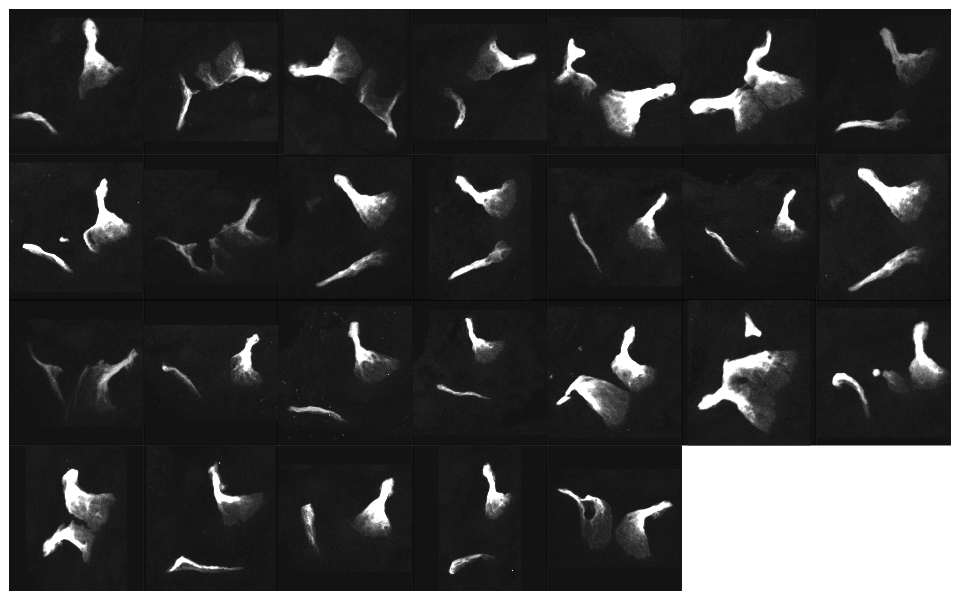

In [12]:


montage_unsel <- (
    L_unsel_plots[[1]] + R_unsel_plots[[1]] + L_unsel_plots[[2]] + R_unsel_plots[[2]] + L_unsel_plots[[3]] + R_unsel_plots[[3]] + L_unsel_plots[[4]] + R_unsel_plots[[4]] + L_unsel_plots[[5]] + R_unsel_plots[[5]]
    + L_unsel_plots[[6]] + R_unsel_plots[[6]] + L_unsel_plots[[7]] + R_unsel_plots[[7]] + L_unsel_plots[[8]] + R_unsel_plots[[8]] + L_unsel_plots[[9]] + R_unsel_plots[[9]] + L_unsel_plots[[10]] + R_unsel_plots[[10]]
    + L_unsel_plots[[11]] + R_unsel_plots[[11]] + L_unsel_plots[[12]] + R_unsel_plots[[12]] + L_unsel_plots[[13]] + R_unsel_plots[[13]] 
    + plot_layout(ncol = 7)
)

png(file.path("..","..","data","7.montage_images","montage_unsel.png"), width = width, height = height, units = "in", res = 600)
montage_unsel
dev.off()
montage_unsel

png 
  2

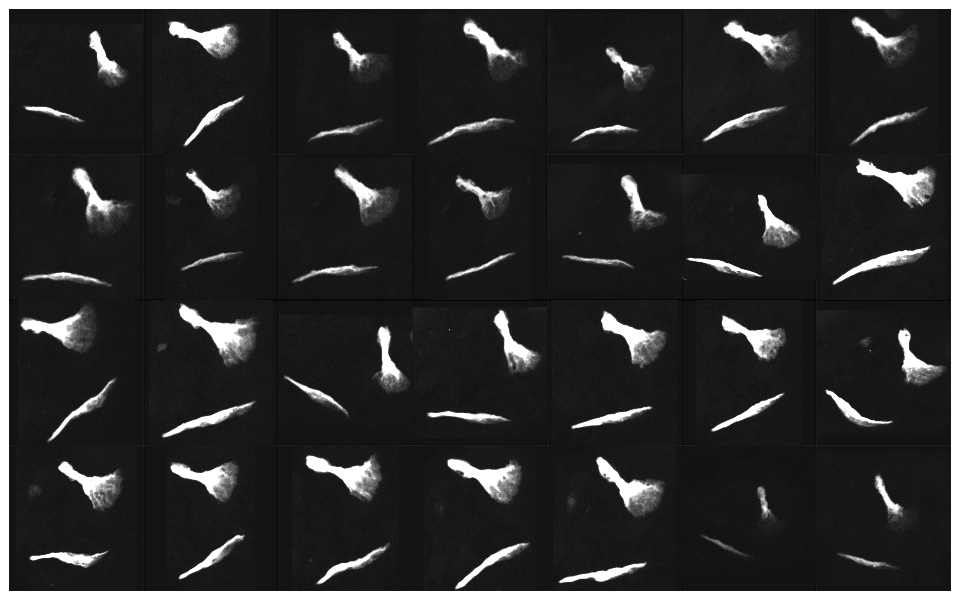

In [13]:

montage_wt <- (
    L_WT_plots[[1]] + R_WT_plots[[1]] + L_WT_plots[[2]] + R_WT_plots[[2]] + L_WT_plots[[3]] + R_WT_plots[[3]] + L_WT_plots[[4]] + R_WT_plots[[4]] + L_WT_plots[[5]] + R_WT_plots[[5]]
    + L_WT_plots[[6]] + R_WT_plots[[6]] + L_WT_plots[[7]] + R_WT_plots[[7]] + L_WT_plots[[8]] + R_WT_plots[[8]] + L_WT_plots[[9]] + R_WT_plots[[9]] + L_WT_plots[[10]] + R_WT_plots[[10]]
    + L_WT_plots[[11]] + R_WT_plots[[11]] + L_WT_plots[[12]] + R_WT_plots[[12]] + L_WT_plots[[13]] + R_WT_plots[[13]] + L_WT_plots[[14]] + R_WT_plots[[14]] 
    + plot_layout(ncol = 7)
)
png(file.path("..","..","data","7.montage_images","montage_wt.png"), width = width, height = height, units = "in", res = 600)
montage_wt
dev.off()

montage_wt